In [74]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [75]:
img_2d = np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]])

In [87]:
def 

In [88]:
new_img_2d = convert_grayscale(img_2d)
print(new_img_2d)

[[[255 255 255]
  [ 76  76  76]
  [ 76  76  76]
  [ 76  76  76]
  [255 255 255]]

 [[255 255 255]
  [ 76  76  76]
  [255 255 255]
  [ 76  76  76]
  [255 255 255]]

 [[255 255 255]
  [ 76  76  76]
  [255 255 255]
  [ 76  76  76]
  [255 255 255]]

 [[255 255 255]
  [ 76  76  76]
  [255 255 255]
  [ 76  76  76]
  [255 255 255]]

 [[255 255 255]
  [ 76  76  76]
  [ 76  76  76]
  [ 76  76  76]
  [255 255 255]]]


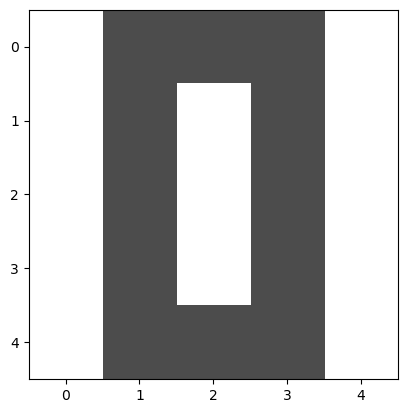

In [89]:
plt.imshow(new_img_2d)